In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

iris = load_iris(as_frame=True)
X = iris.data
y = iris.target

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X)

le = LabelEncoder()
mapped_clusters = pd.Series(clusters).map({
    0: 1, 
    1: 0,
    2: 2
})

print("Cluster Centers:\n", kmeans.cluster_centers_)
print("Accuracy (approx):", accuracy_score(y, mapped_clusters))


Cluster Centers:
 [[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]
Accuracy (approx): 0.8933333333333333


c:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Cluster Labels: [1 0 1 0 1 0 1 2 0 2]


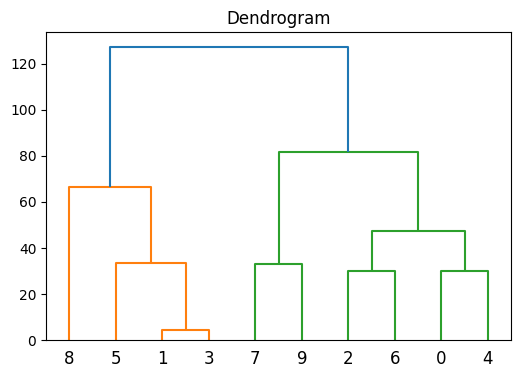

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

data = {
    "Income": [15, 16, 17, 18, 45, 46, 47, 80, 81, 82],
    "Spending": [39, 81, 6, 77, 40, 82, 6, 39, 81, 6]
}
df = pd.DataFrame(data)

hc = AgglomerativeClustering(n_clusters=3, metric="euclidean", linkage="ward")
labels = hc.fit_predict(df)

print("Cluster Labels:", labels)

Z = linkage(df, method='ward')
plt.figure(figsize=(6, 4))
dendrogram(Z)
plt.title("Dendrogram")
plt.show()


Cluster Labels: [0 1]


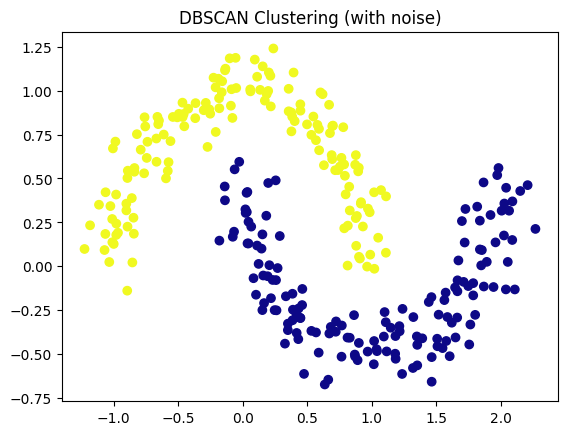

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

X, _ = make_moons(n_samples=300, noise=0.1, random_state=42)

db = DBSCAN(eps=0.2, min_samples=5)
labels = db.fit_predict(X)

print("Cluster Labels:", np.unique(labels))  # -1 means noise

plt.scatter(X[:,0], X[:,1], c=labels, cmap="plasma")
plt.title("DBSCAN Clustering (with noise)")
plt.show()
